In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.stats import skew
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
#import necessary packages

In [81]:
df_train = pd.read_csv('C:\\Users\\jhpat\\Documents\\GitHub\\Housing-Problem\\input\\train.csv')
df_test = pd.read_csv('C:\\Users\\jhpat\\Documents\\GitHub\\Housing-Problem\\input\\test.csv')

In [82]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [83]:
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)
df_train.drop("Utilities", axis = 1, inplace = True)
df_test.drop("Utilities", axis = 1, inplace = True)
y = df_train.SalePrice

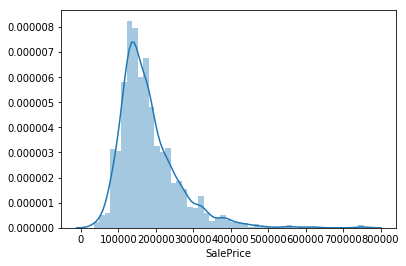

In [84]:
sns.distplot(df_train['SalePrice'], kde=True, rug=False)

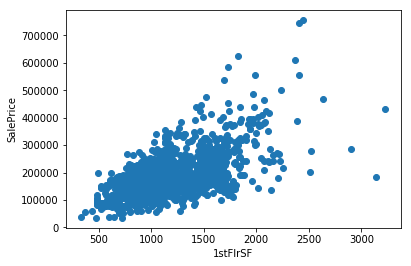

In [85]:
df_train = df_train.drop(df_train[(df_train['1stFlrSF']>4000)].index)

fig, ax = plt.subplots()
ax.scatter(x = df_train['1stFlrSF'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('1stFlrSF', fontsize=10)
plt.show()

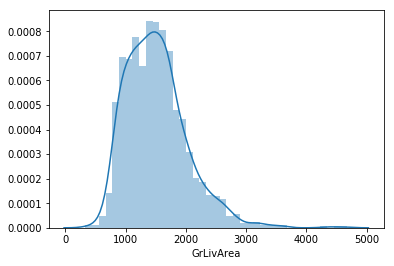

In [86]:
sns.distplot(df_train['GrLivArea'], kde=True, rug=False)

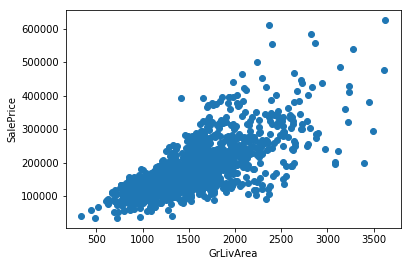

In [87]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000)].index)
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('GrLivArea', fontsize=10)
plt.show()

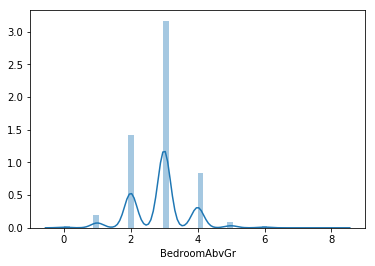

In [88]:
sns.distplot(df_train['BedroomAbvGr'], kde=True, rug=False)

In [89]:
all_data = pd.concat((df_train.loc[:,'MSSubClass':'SaleCondition'],
                      df_test.loc[:,'MSSubClass':'SaleCondition']))

In [90]:
#eliminates null values in cells that include strings

all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["BsmtFinType2"] = all_data["BsmtFinType2"].fillna("None")
all_data["BsmtExposure"] = all_data["BsmtExposure"].fillna("None")
all_data["BsmtFinType1"] = all_data["BsmtFinType1"].fillna("None")
all_data["MSZoning"] = all_data["MSZoning"].fillna("None")
all_data["Functional"] = all_data["Functional"].fillna("Typ")
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data.drop('TotalBsmtSF')
all_data.drop('1stFlrSF')
all_data.drop('2ndFlrSF')
#fills in cells that should have numbers with the column mean
all_data = all_data.fillna(all_data.mean())

In [91]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

all_data = pd.get_dummies(all_data)

In [92]:
df_train = all_data[:1460]
df_test = all_data[1461:]

In [93]:
#Validation function
n_folds = 5

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [94]:
X_train = all_data[:df_train.shape[0]]
X_test = all_data[df_train.shape[0]:]

In [95]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [96]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [97]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [98]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [99]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 89184.3234 (11625.4255)



In [100]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 88273.2268 (11683.2469)



In [101]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 833795.8882 (505973.6916)



In [102]:
score = rmsle_cv(GBoost)
print("Gradient Boosting Regressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting Regressor score: 86218.1037 (12033.5712)

